<a href="https://colab.research.google.com/github/NMPau/hw/blob/main/ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd drive/My\ Drive

/content/drive/My Drive


In [4]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [5]:
cd DA

/content/drive/My Drive/Colab Notebooks/DA


In [6]:
!ls

airlines.csv  flights.csv	      L_AIRPORT.csv	PDA.ipynb
airports.csv  GAZP_210801_220806.txt  L_AIRPORT_ID.csv	titanic.csv


In [30]:
import pandas as pd
df = pd.read_table('GAZP_210801_220806.txt',sep=',')

In [31]:
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,GAZP,D,20210802,0,287.88,289.48,285.21,286.75,38297270
1,GAZP,D,20210803,0,286.77,288.05,284.34,287.09,27065240
2,GAZP,D,20210804,0,287.89,288.80,286.00,287.94,23599750
3,GAZP,D,20210805,0,287.31,288.28,285.16,285.95,47254880
4,GAZP,D,20210806,0,285.26,285.72,277.87,282.27,90600850


In [32]:
df = df[['<DATE>', '<CLOSE>']]

In [34]:
df.columns = ['ds','y']

In [35]:
df['ds'] = pd.to_datetime(df['ds'], format='%Y%m%d', errors='ignore')

In [36]:
df.head()

,ds,y
0,2021-08-02,286.75
1,2021-08-03,287.09
2,2021-08-04,287.94
3,2021-08-05,285.95
4,2021-08-06,282.27


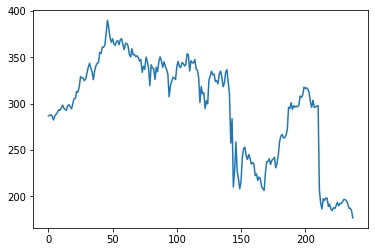

In [37]:
df.y.plot()

In [38]:
df.sort_values(by=['ds'],inplace=True)

In [39]:
df.tail()

,ds,y
233,2022-08-01,192.00
234,2022-08-02,187.16
235,2022-08-03,187.04
236,2022-08-04,184.90
237,2022-08-05,176.58


In [40]:
df.set_index('ds', inplace=True)
df.sort_index(inplace=True)
print('Монотонность - ',df.index.is_monotonic)

Монотонность -  True


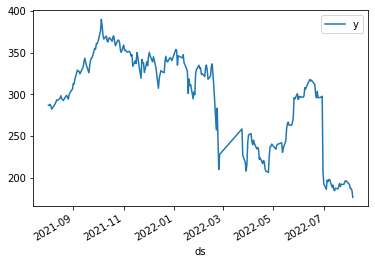

In [41]:
df.plot()

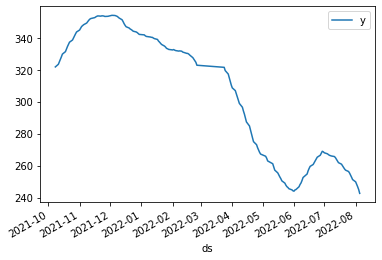

In [42]:
df.rolling(50).mean().plot()

In [43]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['y'].shift(lag)

    data['y_mean'] = data['y'].shift().rolling(rolling_mean_size).mean().copy()

In [44]:
make_features(df, 7, 3)

In [45]:
df.head(6)

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2021-08-02,286.75,2021,8,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-03,287.09,2021,8,3,1,0,286.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-04,287.94,2021,8,4,2,0,287.09,286.75,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-05,285.95,2021,8,5,3,0,287.94,287.09,286.75,NaN,NaN,NaN,NaN,287.260000
2021-08-06,282.27,2021,8,6,4,0,285.95,287.94,287.09,286.75,NaN,NaN,NaN,286.993333
2021-08-09,286.68,2021,8,9,0,0,282.27,285.95,287.94,287.09,286.75,NaN,NaN,285.386667


In [46]:
df.dropna(inplace=True)

In [47]:
df

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2021-08-11,290.35,2021,8,11,2,0,288.61,286.68,282.27,285.95,287.94,287.09,286.75,285.853333
2021-08-12,293.23,2021,8,12,3,0,290.35,288.61,286.68,282.27,285.95,287.94,287.09,288.546667
2021-08-13,292.70,2021,8,13,4,0,293.23,290.35,288.61,286.68,282.27,285.95,287.94,290.730000
2021-08-16,295.10,2021,8,16,0,0,292.70,293.23,290.35,288.61,286.68,282.27,285.95,292.093333
2021-08-17,298.32,2021,8,17,1,0,295.10,292.70,293.23,290.35,288.61,286.68,282.27,293.676667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,192.00,2022,8,1,0,0,195.26,196.25,196.49,193.95,192.00,192.25,189.59,196.000000
2022-08-02,187.16,2022,8,2,1,0,192.00,195.26,196.25,196.49,193.95,192.00,192.25,194.503333
2022-08-03,187.04,2022,8,3,2,0,187.16,192.00,195.26,196.25,196.49,193.95,192.00,191.473333


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
features = df.drop(['y'],axis = 1)
target = df['y']
X_train,X_test,y_train, y_test = train_test_split(features,target, shuffle=False, test_size=0.25)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (173, 13)
X_test (58, 13)


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [51]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [52]:
y_predicted_lr = model_lr.predict(X_test)

In [53]:
y_predicted_lr

array([244.19233229, 256.00841739, 260.40801267, 261.58802053,
       264.30333786, 264.21460192, 265.78988248, 268.47649509,
       285.79192891, 292.51514519, 295.33351871, 291.77019677,
       295.53755248, 294.11262519, 295.28800469, 293.51156338,
       293.42192608, 301.11798185, 301.01452587, 304.31757364,
       310.43043646, 311.94662542, 310.53487564, 311.59230649,
       309.36217203, 299.62168747, 291.45954988, 295.81551813,
       294.82613741, 290.6415951 , 290.28832989, 292.61875427,
       224.32369413, 194.88581349, 192.89859313, 202.12280224,
       188.84334797, 185.24340702, 198.64771686, 194.36794898,
       193.96326899, 189.25278051, 186.49415501, 189.94493974,
       189.6172382 , 190.87129437, 192.90406539, 191.15009811,
       195.02257861, 194.82267912, 196.09455412, 196.71398655,
       196.08122761, 199.16084041, 195.62297355, 190.99031375,
       188.99573107, 186.4760259 ])

In [54]:
print("RMSE тестовой выборки LinearRegression: ",np.sqrt(mean_squared_error(y_test, y_predicted_lr)))

RMSE тестовой выборки LinearRegression:  14.039845196108386


In [55]:
df.tail()

,y,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,y_mean
ds,,,,,,,,,,,,,,
2022-08-01,192.00,2022,8,1,0,0,195.26,196.25,196.49,193.95,192.00,192.25,189.59,196.000000
2022-08-02,187.16,2022,8,2,1,0,192.00,195.26,196.25,196.49,193.95,192.00,192.25,194.503333
2022-08-03,187.04,2022,8,3,2,0,187.16,192.00,195.26,196.25,196.49,193.95,192.00,191.473333
2022-08-04,184.90,2022,8,4,3,0,187.04,187.16,192.00,195.26,196.25,196.49,193.95,188.733333
2022-08-05,176.58,2022,8,5,4,0,184.90,187.04,187.16,192.00,195.26,196.25,196.49,186.366667


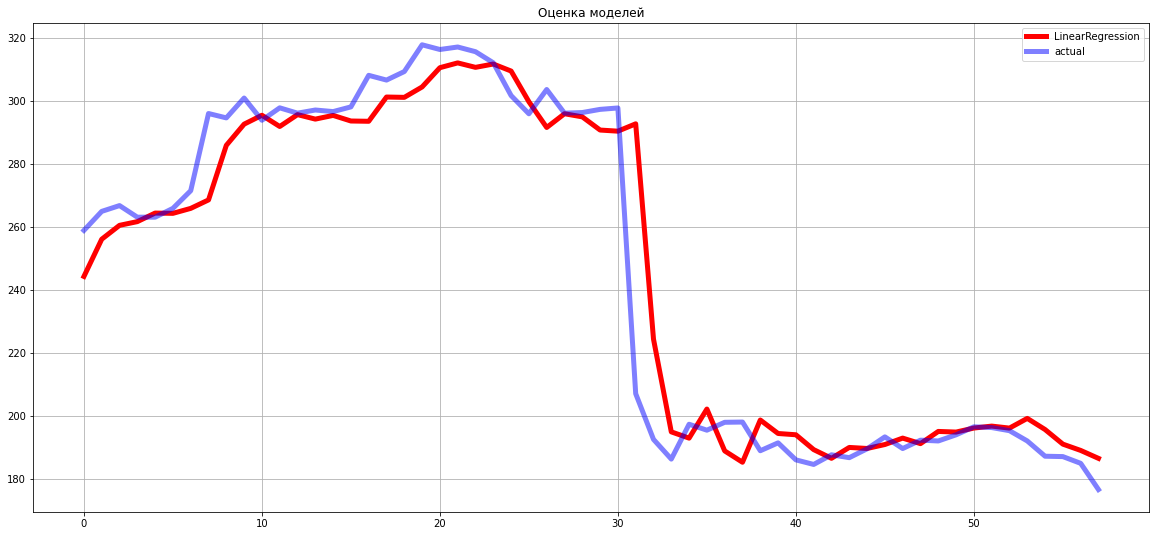

In [56]:
plt.figure(figsize=(20, 9))
plt.plot(y_predicted_lr, "r",linewidth=5, label="LinearRegression")
plt.plot(y_test.values,'b' ,label="actual", linewidth=5, alpha = 0.5)
plt.legend(loc="best")
plt.title("Оценка моделей")
plt.grid(True);

In [57]:
# https://facebook.github.io/prophet/
from prophet import Prophet
m = Prophet()

In [58]:
df_prophet = df[['y']]

In [60]:
df_prophet.reset_index(inplace=True)

In [61]:
df_prophet

,ds,y
0,2021-08-11,290.35
1,2021-08-12,293.23
2,2021-08-13,292.70
3,2021-08-16,295.10
4,2021-08-17,298.32
...,...,...
226,2022-08-01,192.00
227,2022-08-02,187.16
228,2022-08-03,187.04
229,2022-08-04,184.90


In [62]:
m.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9902ulw/26wbulki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo9902ulw/q_737jio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95365', 'data', 'file=/tmp/tmpo9902ulw/26wbulki.json', 'init=/tmp/tmpo9902ulw/q_737jio.json', 'output', 'file=/tmp/tmp4xtk0263/prophet_model-20220918201110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [63]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
233,2022-08-08
234,2022-08-09
235,2022-08-10
236,2022-08-11
237,2022-08-12


In [84]:
forecast = m.predict(future)

In [85]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
231,2022-08-06,187.290242,148.575670,228.246794
232,2022-08-07,186.759693,146.907063,226.685826
233,2022-08-08,207.468467,165.398654,248.631009
234,2022-08-09,211.550795,169.274528,251.039057
235,2022-08-10,211.188400,169.287891,251.922061
236,2022-08-11,206.315982,169.381764,248.711945
237,2022-08-12,203.515382,160.241799,244.542743


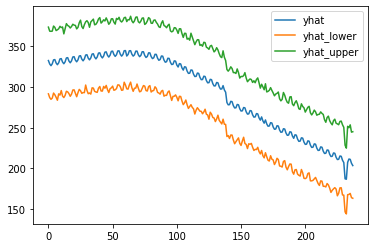

In [67]:
forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']].plot()

In [87]:
forecast.loc[forecast['ds'] == '2022-08-06'][['ds', 'yhat']]

,ds,yhat
231,2022-08-06,187.290242
